In [ ]:
import folium
from shapely.geometry import Polygon

# 중심점 설정 (대략 남해안 중심)
map_center = [34.9, 127.9]
m = folium.Map(location=map_center, zoom_start=8)

# 폴리곤 좌표
regions_polygon_coords = {
    "고흥군": [
        (127.2287, 34.699),
        (127.1149, 34.6899),
        (126.976, 34.4676),
        (127.0914, 34.4404)
    ],
    "대광이도": [
        (128.5345, 35.1036),
        (128.6559, 35.0007),
        (128.5547, 34.9138),
        (128.4121, 34.9903)
    ],
    "진해항": [
        (128.6807, 35.1423),
        (128.8441, 35.0182),
        (128.7544, 34.9632),
        (128.604, 35.1087)
    ],
    "사천시": [
        (128.0309, 35.0233),
        (128.0334, 34.9319),
        (127.9959, 34.9163),
        (127.8976, 34.9479)
    ],
    "거제도": [
        (128.5791, 34.8106),
        (128.5307, 34.7139),
        (128.3377, 34.7663),
        (128.4586, 34.8751)
    ],
    "변산반도 국립공원": [
        (126.5378, 35.7035),
        (126.4213, 35.438),
        (126.2213, 35.5624),
        (126.3255, 35.7058)
    ]
}

# 지도에 폴리곤 추가
for name, coords in regions_polygon_coords.items():
    folium.Polygon(
        locations=[(lat, lon) for lon, lat in coords],  # folium은 (lat, lon) 순서
        popup=name,
        tooltip=name,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(m)

# 지도 저장 및 표시
m.save("polygon_map.html")
print("✅ polygon_map.html 파일이 생성되었습니다.")


# 교통량시각화

C:\Users\HUFS\AppData\Local\Temp\ipykernel_9304\706510260.py:43: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_9304\706510260.py:43: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_9304\706510260.py:43: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_9304\706510260.py:43: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_9304\706510260.py:43: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_9304\706510260.py:43: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu 

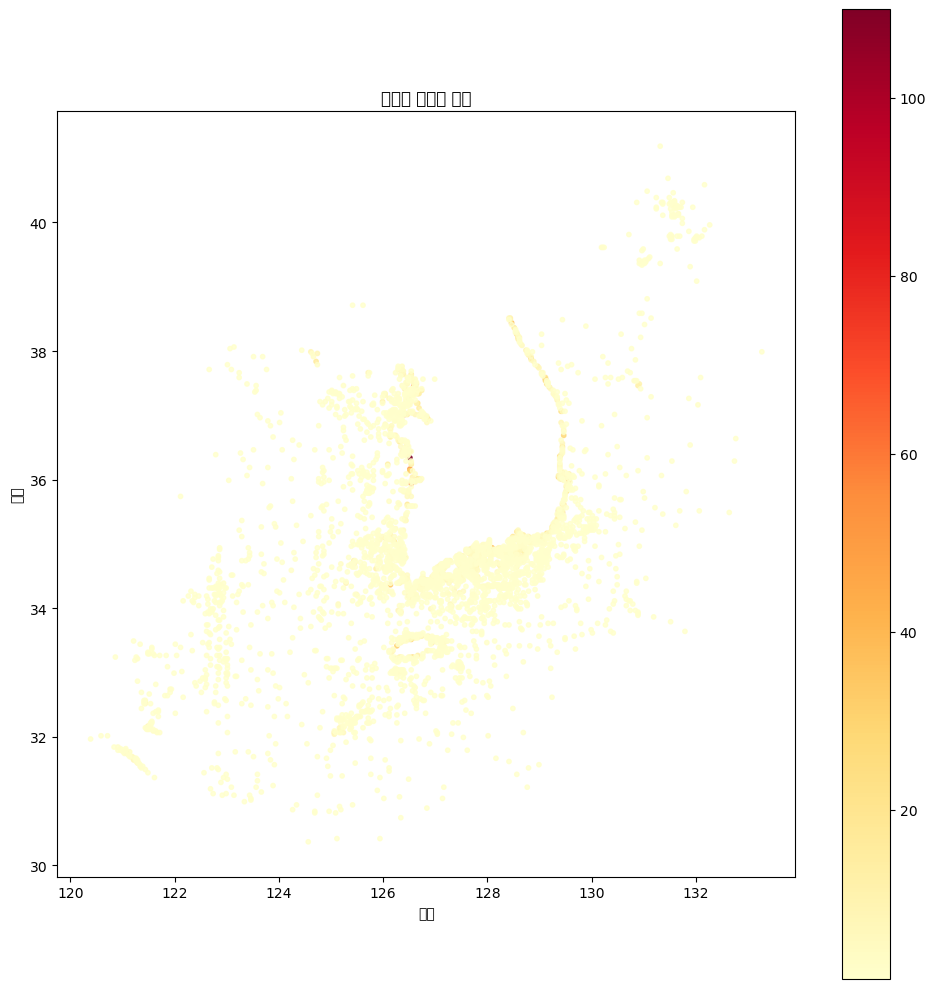

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib as mpl

# ----------------------------
# 1. 데이터 불러오기
# ----------------------------
file_path = "교통량_202505192156.xlsx"  # 로컬 경로에 맞게 수정하세요
df = pd.read_excel(file_path, sheet_name='Sheet1')

# ----------------------------
# 2. 위경도 분리 및 변환
# ----------------------------
df[['위도', '경도']] = df['위경도'].str.split(',', expand=True).astype(float)

# ----------------------------
# 3. GeoDataFrame 생성
# ----------------------------
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['경도'], df['위도']), crs='EPSG:4326')

# ----------------------------
# 4. 시각화
# ----------------------------
# 한글 폰트 오류 방지를 위한 기본 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # or 'Arial'
mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax,
    column='교통량(척)',    # 색상 기준 변수
    cmap='YlOrRd',         # 색상맵
    legend=True,           # 범례 표시
    markersize=10,         # 점 크기
    alpha=0.8,              # 투명도
)

ax.set_title('지도상 교통량 분포')
ax.set_xlabel('경도')
ax.set_ylabel('위도')
plt.tight_layout()
plt.show()


C:\Users\HUFS\AppData\Local\Temp\ipykernel_21088\2094589912.py:104: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left')
C:\Users\HUFS\AppData\Local\Temp\ipykernel_21088\2094589912.py:106: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_21088\2094589912.py:106: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_21088\2094589912.py:106: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\AppData\Local\Temp\ipykernel_21088\2094589912.py:106: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUFS\Ap

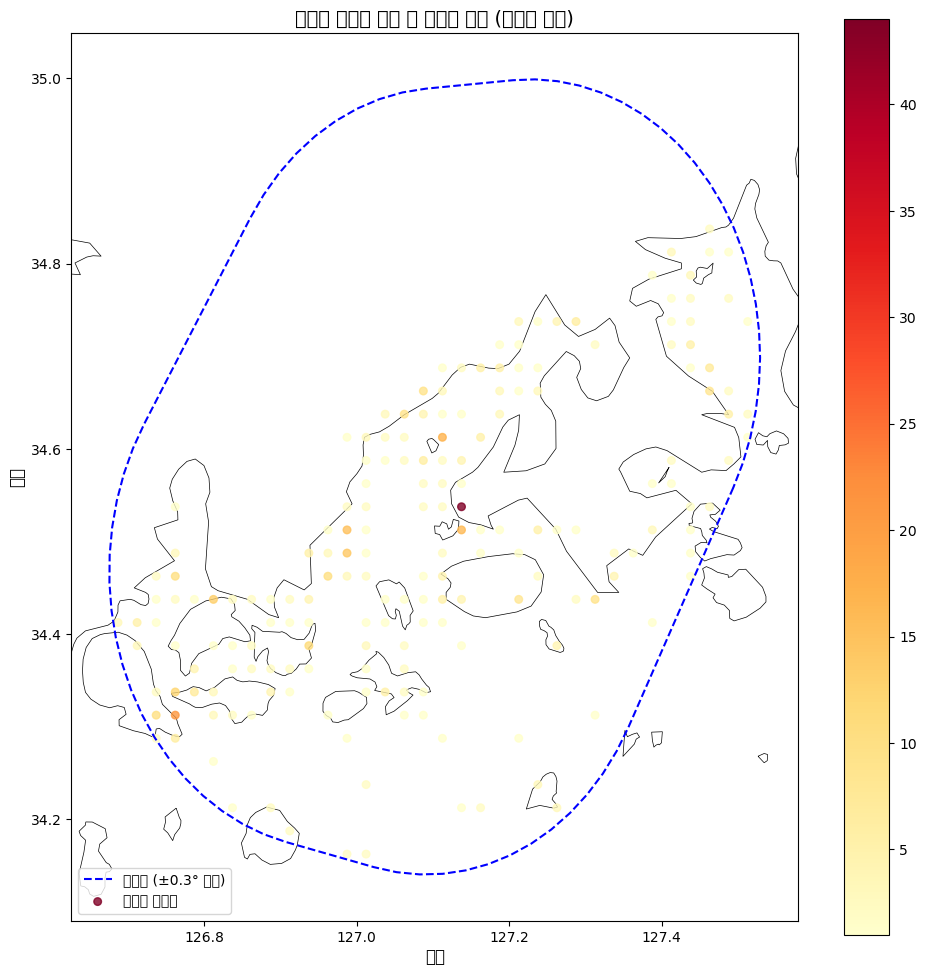

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import matplotlib as mpl

# ----------------------------
# 1. 데이터 불러오기
# ----------------------------
file_path = "교통량_202505192156.xlsx"  # 실제 파일 경로로 수정하세요
df = pd.read_excel(file_path, sheet_name='Sheet1')

# ----------------------------
# 2. 위경도 분리 및 변환
# ----------------------------
df[['위도', '경도']] = df['위경도'].str.split(',', expand=True).astype(float)

# ----------------------------
# 3. GeoDataFrame 생성
# ----------------------------
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['경도'], df['위도']),
    crs='EPSG:4326'
)

# ----------------------------
# 4. 폴리곤 정의 및 버퍼(확장)
# ----------------------------
goheung_coords = [
    (127.2287, 34.699),
    (127.1149, 34.6899),
    (126.9760, 34.4676),
    (127.0914, 34.4404)
]
poly = Polygon(goheung_coords)
buffered_poly = poly.buffer(0.3)  # ±0.3° 버퍼

# ----------------------------
# 5. 폴리곤(버퍼) 안에 있는 포인트만 필터링
# ----------------------------
gdf_sub = gdf[gdf.geometry.within(buffered_poly)].copy()

# ----------------------------
# 6. 해안선 불러오기 (전지구 데이터)
# ----------------------------
coastline_path = r"C:\Users\HUFS\Desktop\sediment_final\dataset\ne_land\ne_10m_land.shp" # 실제 전지구 해안선 파일
coastline_gdf = gpd.read_file(coastline_path).to_crs(epsg=4326)

# ----------------------------
# 7. 축 제한 범위 계산
# ----------------------------
minx, miny, maxx, maxy = buffered_poly.bounds
# 약간의 여유(margin)를 두고 싶으면 ±0.05 정도 추가할 수 있음:
margin = 0.05
xlim = (minx - margin, maxx + margin)
ylim = (miny - margin, maxy + margin)

# ----------------------------
# 8. 시각화
# ----------------------------
plt.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10, 10))

# (1) 전지구 해안선 중 해당 범위 안에 보이는 부분만 그리기
#    → 전체를 그린 뒤 축을 제한하면 범위 외부는 시각적으로 잘립니다.
coastline_gdf.plot(
    ax=ax,
    edgecolor='black',
    facecolor='none',
    linewidth=0.5,
    label='해안선(전지구)'
)

# (2) 버퍼된 폴리곤 윤곽선 그리기
gpd.GeoSeries(buffered_poly, crs='EPSG:4326').boundary.plot(
    ax=ax,
    edgecolor='blue',
    linestyle='--',
    linewidth=1.5,
    label='고흥군 (±0.3° 버퍼)'
)

# (3) 필터링된 교통량 데이터 점으로 그리기
gdf_sub.plot(
    ax=ax,
    column='교통량(척)',
    cmap='YlOrRd',
    legend=True,
    markersize=30,
    alpha=0.8,
    label='교통량 데이터'
)

# (4) 축(limits) 설정
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_title('버퍼된 고흥군 영역 내 교통량 분포 (해안선 포함)', fontsize=14)
ax.set_xlabel('경도', fontsize=12)
ax.set_ylabel('위도', fontsize=12)
ax.legend(loc='lower left')

plt.tight_layout()
plt.show()


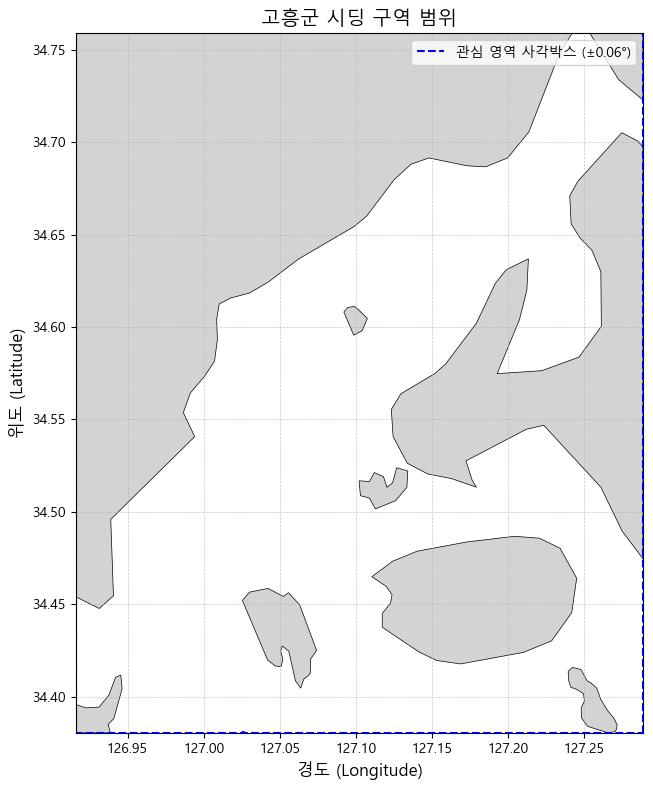

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box

# ----------------------------
# 1) “고흥군” 폴리곤 좌표에서 계산된 사각박스 경계
# ----------------------------

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

regions_polygon_coords = {
    "고흥군": [
        (127.2287, 34.699),
        (127.1149, 34.6899),
        (126.9760, 34.4676),
        (127.0914, 34.4404)
    ]
}

SELECTED_REGION = "고흥군"
selected_coords = regions_polygon_coords[SELECTED_REGION]
polygon_lons, polygon_lats = zip(*selected_coords)

# ±0.06° 패딩을 더한 사각박스 경계
lon_min = min(polygon_lons) - 0.06
lon_max = max(polygon_lons) + 0.06
lat_min = min(polygon_lats) - 0.06
lat_max = max(polygon_lats) + 0.06

# shapely의 box 함수로 사각박스 생성
bounding_box = box(lon_min, lat_min, lon_max, lat_max)

# ----------------------------
# 2) 전지구 해안선 불러오기 및 사각박스로 클리핑
# ----------------------------
land_shp = r"C:\Users\HUFS\Desktop\sediment_final\dataset\ne_land\ne_10m_land.shp"  # 실제 해안선 Shapefile 경로로 수정
coast = gpd.read_file(land_shp).to_crs(epsg=4326)

# bbox 영역만 잘라내기
coast_clipped = gpd.clip(coast, bounding_box)

# ----------------------------
# 3) 시각화
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# (1) 잘라낸 해안선 배경
coast_clipped.plot(
    ax=ax,
    facecolor='lightgray',
    edgecolor='black',
    linewidth=0.5,
    zorder=0
)

# (2) 사각박스 윤곽선 그리기
gpd.GeoSeries(bounding_box, crs='EPSG:4326').boundary.plot(
    ax=ax,
    edgecolor='blue',
    linestyle='--',
    linewidth=1.5,
    label='관심 영역 사각박스 (±0.06°)'
)

# (3) 축 범위 설정
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# (4) 레이블, 제목, 범례, 그리드
ax.set_title(f'{SELECTED_REGION} 시딩 구역 범위', fontsize=14)
ax.set_xlabel('경도 (Longitude)', fontsize=12)
ax.set_ylabel('위도 (Latitude)', fontsize=12)
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


In [1]:
import folium

# 중심 좌표 설정 (중앙값)
center_lat = (34.1 + 34.9) / 2
center_lon = (125.48 + 128.0) / 2

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# 사각형 범위 추가
bounds = [[34.1, 125.48], [34.9, 128.0]]
folium.Rectangle(bounds=bounds, color='red', weight=3, fill=False).add_to(m)

# 출력
m